- **1. Project Overview:**
  - Using data scraped from the landing page of Ebay, the project aims to answer two key questions:
    - What are the prices of products advertised on the company's landing page?
    - Can data gathered from websites be used to classify an ecommerce site's marketing strategy as aggressive or passive?


- **Data Sources:**
    - Ebay

**Functions:**

In [1]:
def drop_rows(start, end):
    rows_to_drop = [x for x in range(start, end)]
    df.drop(rows_to_drop, axis=0, inplace=True)

-**2 Data Collection and Loading** 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_fwf("scraper_data.txt")
df

Continue focusing on prices, displaying the top and bottom rows are extremely importing for deleting erroneous text:

In [ ]:
df.head(60)

  -**Data Cleaning and Preparation**

Remove the first 60 rows as it has no pertinent sales data.

In [ ]:
drop_rows(0, 60)
df.head(60)

Continue cleaning the head data.

In [ ]:
drop_rows(60,119)
df.head(60)

In [6]:
drop_rows(119,178)

In [ ]:
df.head(60)

In [ ]:
drop_rows(178,237)
df.head(60)

In [ ]:
drop_rows(237,296)
df.head(60)

In [ ]:
drop_rows(296,355)
df.head(60)

In [11]:
drop_rows(355,358)

The indices that include pricing is available, we have found the top limit of our index.

Check the tail and begin cleaning this information as well

In [12]:
df.tail(60)
drop_rows(634,694)

In [ ]:
df.tail(60)

In [ ]:
drop_rows(575,634)
df.tail(60)

In [ ]:
drop_rows(556,574)
df.tail()

In [ ]:
df

The dataframe contains only those in the range that have obvious pricing details.  It is important to note the range here, as it helps to show how high on the page all of these results are located. The higher the number, the closer to the top of the page the word was originally located. 

In [17]:
websites_pricing_positions = []
websites_pricing_positions.append("Ebay = 358-574")

Now let's remove the names of products so we can continue to focus in on the price

In [ ]:
df.columns

In [ ]:
ebay_prices = df[df.apply(lambda row: row.astype(str).str.startswith('$').any(), axis=1)]
ebay_prices

In [20]:
ebay_prices = ebay_prices.replace({r'\$': "", r',': ""}, regex=True)




To improve readability lets rename the columns to be more sensible.

In [ ]:
ebay_prices.rename(columns={'Skip to main content':'price'}, inplace=True)
ebay_prices['price'] = pd.to_numeric(ebay_prices['price'], errors='coerce')
ebay_prices = ebay_prices.reset_index(drop=True)
ebay_prices


  -**4. Exploratory Data Analysis**

**Provide a summary of the data**

In [ ]:
ebay_prices.describe()

**Create a plot to explore relationships**

In [ ]:
ebay_prices['Index'] = ebay_prices.index

In [ ]:
ebay_prices.plot.scatter('price', 'Index')

Drop the outlier

In [ ]:
ebay_prices.head(20)

In [ ]:
ebay_prices.drop(index=10, inplace=True)

In [ ]:
ebay_prices.head(20)

Review the scatterplot from before:

,price,Index
count,71.000000,71.000000
mean,944.653521,35.859155
std,1175.123888,20.852746
min,69.990000,0.000000
25%,198.500000,18.500000
50%,349.990000,36.000000
75%,1044.000000,53.500000
max,4250.000000,71.000000


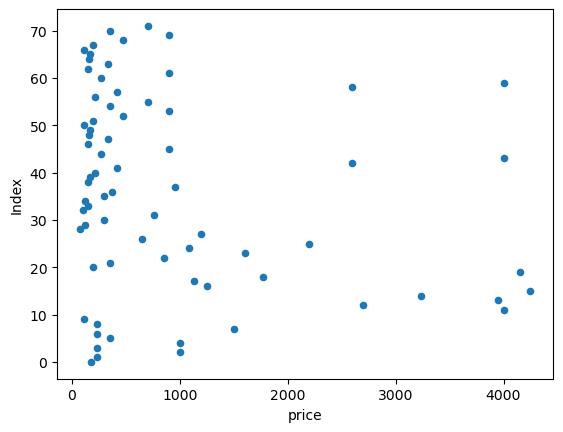

In [46]:
ebay_prices.plot.scatter('price', 'Index')
ebay_prices.describe()

  -**5. Analysis and Insights**

From this data we can infer that the smallest price, 69.99 was found at the index 0, which represents the highest point on the page where the original data was scraped.  The index also shows that the majority of the the items were between the price of 0 and 1000 dollars, with more expensive items sprinkled into the first half of the page.

  -**6. Conclusion and Recommendations**
    -From the analysis of ebays front page, it is obvious that ebay promotes more items under the 1000 dollar mark, despite adding in many items above that price range as well.  To further discuss the question of whether this is an aggressive or passive strategy, additional comparative research should be implemented analysing more websites and comparing their pricing distribution and landing page placement.  Using a linear regression model, one could easily provide average pricing across many ecommerce sites to analyse marketing agression and success.